## ISM 6136 Data Mining Project - Credit Card Approval Prediction Analysis
Authors: (Group name- Zenith Section 04)
###### Divyanshi Singh- U72033788


#### Business Challenge
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low-income levels, or too many inquiries on an individual’s credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!).
This task can be automated with the power of machine learning, and pretty much every commercial bank does so nowadays. In this project, we will build an automatic credit card approval predictor using machine learning techniques.


#### Task
We will build a machine learning model to predict if an applicant is a 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. We will analyze the datasets to construct our label. Also, unbalance data problem is a big problem in this task that we will try to solve and come up with a better predictive model.

The structure of this notebook is as follows:

1.First, we will start off by loading and viewing the datasets.

2.We will see that the datasets have a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.

3.We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.

4.After our data is in good shape, we will do some exploratory data analysis to build our intuitions.

5.Finally, we will build the best machine learning model that can predict if an individual's application for a credit card will be accepted by understanding a good or bad applicant.

### Step 1: Important necessary packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing 
from sklearn.tree import plot_tree
import warnings
import datetime
from datetime import timedelta
warnings.filterwarnings('ignore')
random_seed = 1
np.random.seed(random_seed)


credit_record = pd.read_csv('C:/Users/panka/Downloads/credit record/credit_record.csv')
application_record = pd.read_csv('C:/Users/panka/Downloads/application record/application_record.csv')
print(application_record.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

### Step 2: Data Pre-Processing

#### 2.1 Data Exploration

In [2]:
print(application_record.shape, credit_record.shape)

(438557, 18) (1048575, 3)


#### 2.2 Merge the Data

In [3]:
data = application_record.merge(credit_record,how='inner',on=['ID'])

In [4]:
data.shape

(777715, 20)

#### 2.3 Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

converting object to cateogorical data type

In [690]:
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].astype('category')
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].astype('category')
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].astype('category')
data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].astype('category')

<AxesSubplot:>

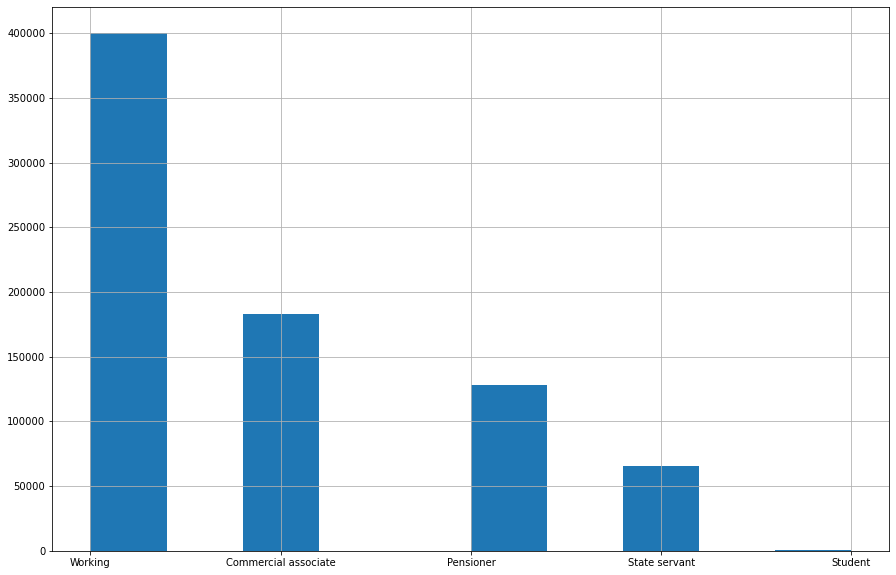

In [691]:
data['NAME_INCOME_TYPE'].hist(figsize= (15,10))

Most of the applicants are "working" for their income. We see very fewer students in the data.

In [692]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [693]:
# Convert days birth to age column and days employed to work years 
data['AGE']=(data['DAYS_BIRTH']/365)*-1
data['AGE']=data['AGE'].apply(lambda v : int(v))
data['WORK_YEARS']=data['DAYS_EMPLOYED']/365
data['WORK_YEARS']=data['WORK_YEARS'].apply(lambda v : int(v*-1) if v <0 else 0)
data=data.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'])
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,WORK_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,0,C,32,12
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,-1,C,32,12
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,-2,C,32,12
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,-3,C,32,12
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,-4,C,32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-9,0,25,3
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-10,2,25,3
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-11,1,25,3
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,-12,0,25,3


<AxesSubplot:>

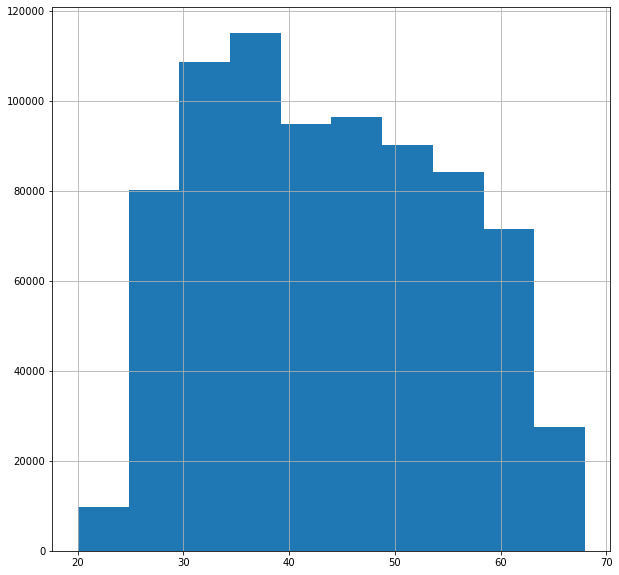

In [752]:
data['AGE'].hist(figsize= (10,10))

Majority of the applicants are between ages 30 and 40 years.

In [695]:
# children count is subset of family size so we can drop the children count feature 
data=data.drop(columns=['CNT_CHILDREN'])

#### 2.4 Data Cleaning

##### check missing values(Null) in the Dataset

In [696]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE        240048
ID                          0
FLAG_WORK_PHONE             0
AGE                         0
STATUS                      0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_MOBIL                  0
CODE_GENDER                 0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
AMT_INCOME_TOTAL            0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
WORK_YEARS                  0
dtype: int64

In [697]:
data.duplicated().sum()

0

There are no duplicate rows in the dataset

In [698]:
data['OCCUPATION_TYPE'].fillna('Other',inplace=True) # we are storing "other" in place of nulls

In [699]:
data = data.drop(['FLAG_MOBIL'] , axis = 1)

In [700]:
data['OCCUPATION_TYPE'].value_counts()

Other                    240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [701]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
AGE                    0
WORK_YEARS             0
dtype: int64

### Step 3: Data Visualization

In [702]:
data['NAME_FAMILY_STATUS'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

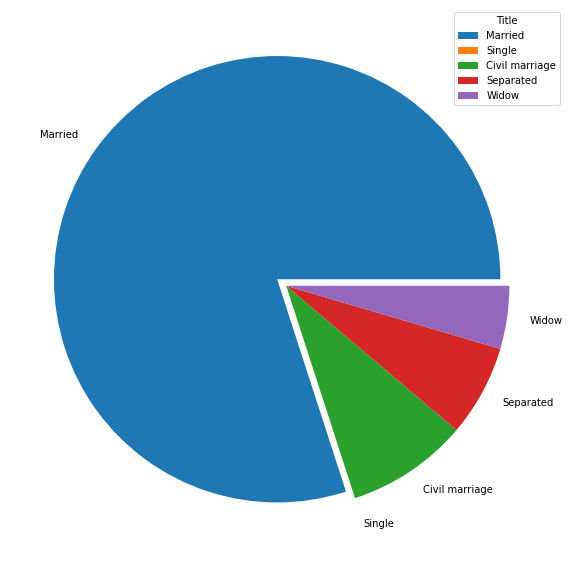

In [703]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_FAMILY_STATUS']=='Married'
m=m.sum()
s=data['NAME_FAMILY_STATUS']=='Single'
s=s.sum()
Cv=data['NAME_FAMILY_STATUS']=='Civil marriage'
Cv=Cv.sum()
sep=data['NAME_FAMILY_STATUS']=='Separated'
sep=sep.sum()
w=data['NAME_FAMILY_STATUS']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From the above pie chart ,we conclude that majority of people are married so there expenses more than others.so, we have a better chance to approve their credit card as they can use credit card regularly and in efficient manner for their expenses.

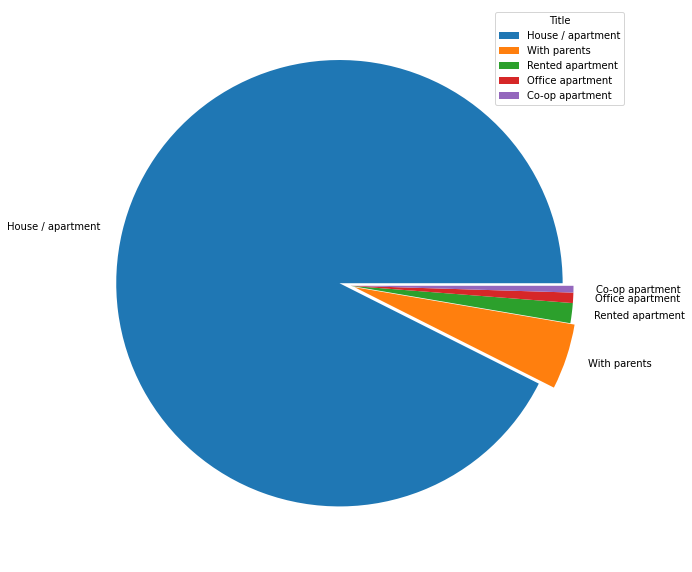

In [704]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_HOUSING_TYPE']=='House / apartment'
m=m.sum()
s=data['NAME_HOUSING_TYPE']=='With parents'
s=s.sum()
Cv=data['NAME_HOUSING_TYPE']=='Rented apartment'
Cv=Cv.sum()
sep=data['NAME_HOUSING_TYPE']=='Office apartment'
sep=sep.sum()
w=data['NAME_HOUSING_TYPE']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From this above pie chart , we conclude that most of the people live in their own house or apartment.So, there is a high chance that they are able to pay their bills on time and we can approve their credit card application.

<AxesSubplot:xlabel='STATUS', ylabel='MONTHS_BALANCE'>

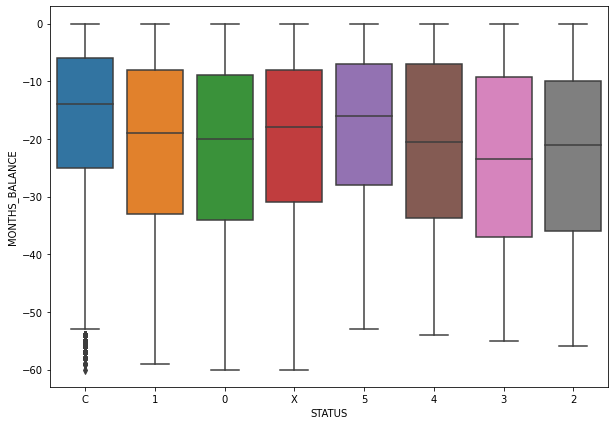

In [705]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=data['STATUS'], y=data['MONTHS_BALANCE'])

Outliers in Months_Balance are found in approved class than rejected. Hence removing extreme values might not affect the model performance in detecting the reject cases

### Step 5: Feature Scaling

In [706]:
from sklearn.preprocessing import LabelEncoder

objectColumns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
                "OCCUPATION_TYPE"]
for objColumn in objectColumns:
    label = LabelEncoder()
    data[objColumn] = label.fit_transform(data[objColumn].values)

<AxesSubplot:xlabel='STATUS'>

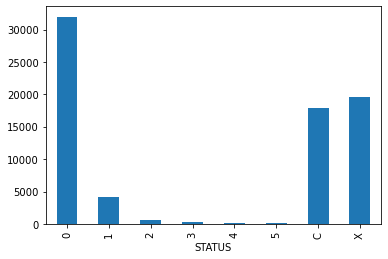

In [707]:
data.groupby('STATUS').count()
grouped=data.groupby('ID')['STATUS'].value_counts()
number_of_customer_for_each_status=grouped.groupby('STATUS').count()
number_of_customer_for_each_status.plot(kind='bar')

0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month


In [708]:
map_status = {'C' : 1,
              'X' : 1,
              '0' : 1,
              '1' : 0,
              '2' : 0,
              '3' : 0,
              '4' : 0,
              '5' : 0}
data["STATUS"] = data['STATUS'].map(map_status)

In [709]:
data["STATUS"].value_counts()

1    766140
0     11575
Name: STATUS, dtype: int64

##### 20% of applicants already paid current month loan.
##### 36.5% of applicants doesn't have loan of the current month. 
##### 42.2% of applicants  have overdue for 1-29 days. 
##### 1.1% of applicants have overdue for 30-59 days. 
##### 0.1% of applicants have overdue for 60-89 days. 

#### 5.1 Correlation Matrix

<AxesSubplot:>

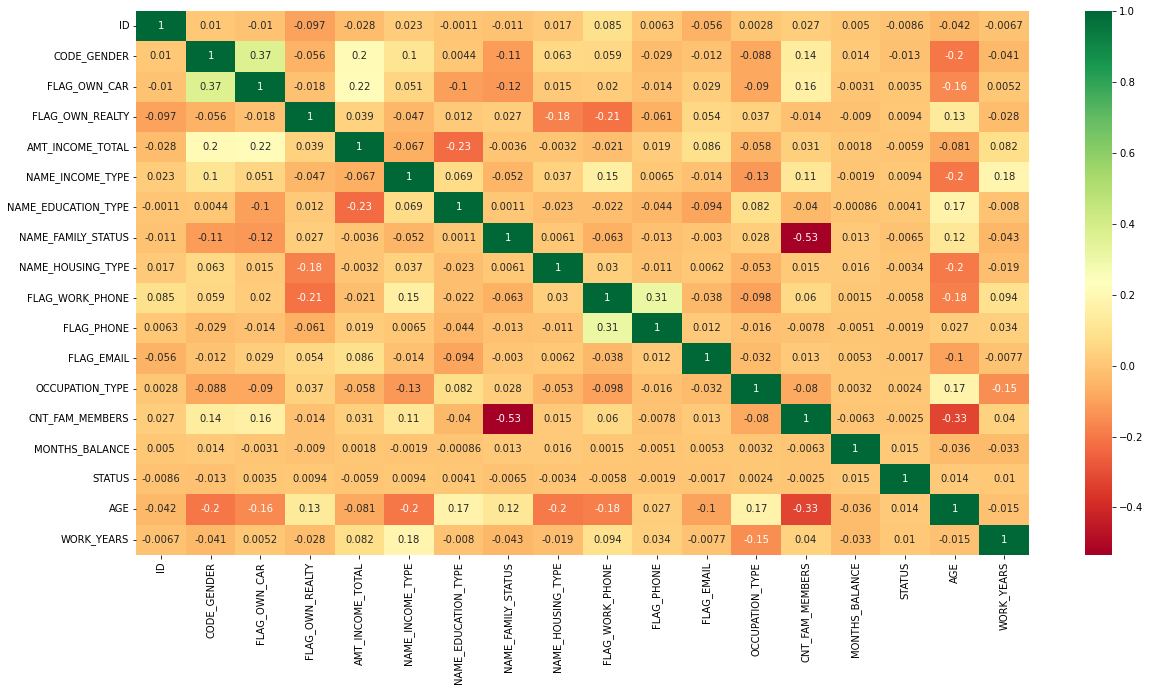

In [710]:
#plt.figure(12,10)
#sns.heatmap(data[data.corr().index].corr(),annot=True,cmap='RdYlGn')
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

Drop unwanted columns from this analysis based on the correlation plot. As we can see above, input variables like 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ID','FLAG_PHONE' and 'FLAG_EMAIL'
have no or little correlation with the target variable (Status).

In [711]:
data.drop(['NAME_EDUCATION_TYPE','OCCUPATION_TYPE','ID','FLAG_PHONE','FLAG_EMAIL'], inplace=True, axis=1)

### Step 6: Address Data Imbalances


Ratio of the customers not approved or bad customers: 1.49%
Ratio of the customers approved or good customers: 98.51%


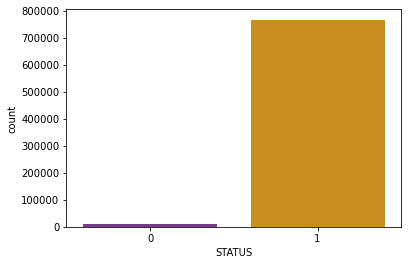

In [712]:
# let's explore the class (target variable)
import seaborn as sns
sns.countplot(data["STATUS"], palette='CMRmap')
bad = (data["STATUS"].value_counts()[0] / len(data["STATUS"])) * 100
good = (data["STATUS"].value_counts()[1] / len(data["STATUS"])) * 100
print('\nRatio of the customers not approved or bad customers: %.2f%%' % bad)
print('Ratio of the customers approved or good customers: %.2f%%' % good)

Partition data into training and test sets (75:25 split)

In [713]:
train_df, test_df = train_test_split(data, test_size=0.25, random_state = 1)

Address any data imbalances

We will utilize an undersampling technique to address any necessary date balancing.

In [714]:
good_count_df  = train_df.loc[train_df.STATUS==1]
bad_count_df  = train_df.loc[train_df.STATUS==0]

In [715]:
good_count_df.shape

(574617, 13)

In [716]:
bad_count_df.shape

(8669, 13)

In [717]:
sampled_data = good_count_df.sample(len(bad_count_df))
train_df = pd.concat([sampled_data,bad_count_df])
print(f'count = {len(train_df)}')

count = 17338


#### Observations :




###### 1. Occupation type column has 30% missing values and hence can either dropped or imputed (missing values as unknown)
###### 2. Most of the categorical columns/features seem to be binary in nature
###### 3. Major class imbalance observed. Only 1.49% of applicants belong to rejected category
###### 5. Income and number of family members seem to have extreme values/data points (possibly outliers)

###  Step 7: Train Model and Measure Performance 

In [718]:
X_train = train_df.drop(columns=['STATUS'])
y_train = train_df.STATUS
X_test = test_df.drop(columns=['STATUS'])
y_test = test_df.STATUS

In [719]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
# Transform the predictors of training and test sets
X_train = scaler.transform(X_train) # train_predictors is not a numpy array
X_test = scaler.transform(X_test) # test_target is now a series object


#### 7.1 Prediction with Decision Tree (using default parameters)

In [720]:
dtree=DecisionTreeClassifier(random_state=42)
#fit the model using all the default parameters
_ = dtree.fit(X_train, y_train)
#Review of the performance of the model on the validation/test data
y_pred = dtree.predict(X_test)
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.6920474303347378
Accuracy Score:   0.6934716528912868
Precision Score:  0.995359001509451
F1 Score:         0.8164430646413128


#### 7.2 Prediction with RandomForest (using default parameters)

In [721]:
rforest = RandomForestClassifier(random_state=42)
_ = rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.7985359460743618
Accuracy Score:   0.7984508483816715
Precision Score:  0.9960791976032304
F1 Score:         0.8864352306680229


#### 7.3 Prediction with ADABoost (using default parameters)

In [722]:
aboost = AdaBoostClassifier(random_state=random_seed)
_ = aboost.fit(X_train, y_train)
y_pred = aboost.predict(X_test)
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.5930828151188108
Accuracy Score:   0.5926945054492899
Precision Score:  0.9890462963769189
F1 Score:         0.7415151614061428


#### 7.4 Prediction with GradientBoostingClassifier

In [723]:
gboost = GradientBoostingClassifier(random_state=42)
_ = gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.6447424069171849
Accuracy Score:   0.6440448698496624
Precision Score:  0.9906298385091175
F1 Score:         0.7811078709824337


#### 7.5 Prediction with XGBoostingClassifier

In [724]:
xboost = XGBClassifier(random_state=42)
_ = xboost.fit(X_train, y_train)
y_pred = xboost.predict(X_test)
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.7470956490865327
Accuracy Score:   0.7466170170087796
Precision Score:  0.994246563920119
F1 Score:         0.8531318846758109


#### 7.6 Prediction with KNN classifier

In [725]:
knn = KNeighborsClassifier(n_neighbors = int(len(y_train)**(1/2)), metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("*****Confusion Matrix******")
print(confusion_matrix(y_test, y_pred))
print("************************************")
print("*******Classification Report******")
print(classification_report(y_test, y_pred))

*****Confusion Matrix******
[[  1677   1229]
 [ 73866 117657]]
************************************
*******Classification Report******
              precision    recall  f1-score   support

           0       0.02      0.58      0.04      2906
           1       0.99      0.61      0.76    191523

    accuracy                           0.61    194429
   macro avg       0.51      0.60      0.40    194429
weighted avg       0.98      0.61      0.75    194429



#### 7.7 Prediction with Logistic Regression

In [726]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
logClassifier=LogisticRegression(random_state=1) # Create the model
_ = logClassifier.fit(X_train,y_train) # fit the model to training data. NOTE: underscore is a dummy variable that is useed to suppress output
y_pred = logClassifier.predict(X_test)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

***********************
Recall Score:     0.568
***********************
Accuracy Score:   0.568
Precision Score:  0.988
F1 Score:         0.722
***********************


### Step 8: Tuning models using Hyperparameters

#### 8.1 Hyperparameter Tuning for LogisticRegression (using GridSearchCV)

In [727]:
param_grid = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'penalty': ['l1', 'l2', 'none'], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [500000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }

In [728]:
best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=42),
                                    scoring='f1', param_grid=param_grid, 
                                    cv=10, verbose=0,  n_jobs = -1)
best_logClassifer = best_logClassifer.fit(X_train, y_train)

In [729]:
y_pred = best_logClassifer.predict(X_test)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

***********************
Recall Score:     0.569
***********************
Accuracy Score:   0.568
Precision Score:  0.988
F1 Score:         0.722
***********************


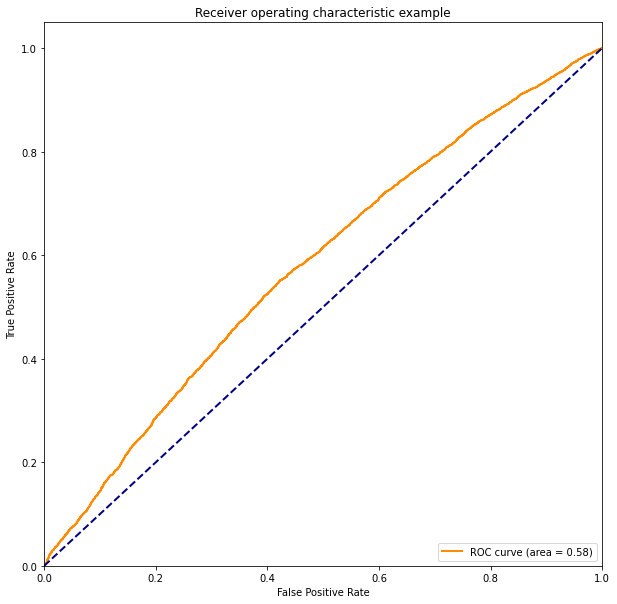

In [730]:
# compute tpr and fpr for for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, best_logClassifer.predict_proba(X_test)[:,1])

# compute roc auc
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

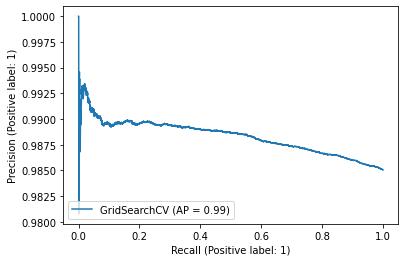

In [731]:
PrecisionRecallDisplay.from_estimator(best_logClassifer, X_test, y_test) 
plt.show()

#### 8.2 Hyperparameter Tuning for Decision Tree (using RandomSearchCV)

In [744]:
# Criterion used to guide data splits
criterion = [ 'entropy', 'log_loss']

# Maximum number of levels in tree. If None, then nodes are expanded until all leaves are pure or until all 
# leaves contain less than min_samples_split samples.
# default = None
max_depth = [int(x) for x in np.linspace(1, 40000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
# default is 2
min_samples_split = [int(x) for x in np.linspace(2, 5000, 50)]

# Minimum number of samples required at each leaf node
# default = 1 
min_samples_leaf = [int(x) for x in np.linspace(1, 10000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes in best-first fashion.
# If None then unlimited number of leaf nodes.
# default=None 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)

# min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# default=0.0
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }

In [745]:
dtree_default = DecisionTreeClassifier(random_state=42)
best_random_search_model = RandomizedSearchCV(
        estimator=dtree_default, 
        scoring='recall', 
        param_distributions=param_grid_random, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

In [746]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 1634, 'min_samples_leaf': 1837, 'min_impurity_decrease': 0.0018, 'max_leaf_nodes': 182525, 'max_depth': None, 'criterion': 'entropy'}


In [747]:
y_pred = best_random_search_model.predict(X_test)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print("************************************")

************************************
Recall Score:     0.6033740072993844
************************************
Accuracy Score:   0.6017672260825289
Precision Score:  0.9874813074129459
F1 Score:         0.7490568728366412
************************************


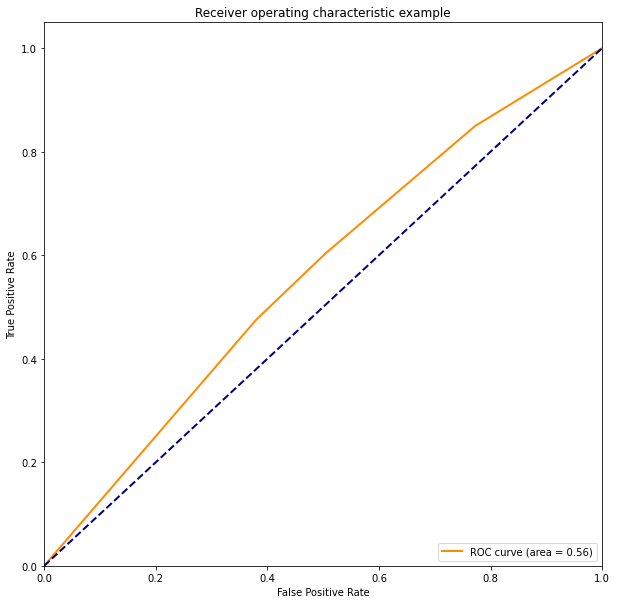

In [748]:
# compute tpr and fpr for for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, best_random_search_model.predict_proba(X_test)[:,1])

# compute roc auc
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

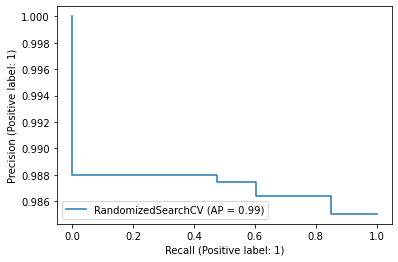

In [749]:
PrecisionRecallDisplay.from_estimator(best_random_search_model, X_test, y_test) 
plt.show()

### Step 9: Conclusion

Our scoring metrics is more focussed on F1 Score due to the foloowing reasons :
a.False Negatives meaning the number of negative instances (denied applications) predicted by the model incorrectly
b.False Positives meaning the number of positive instances (approved applications) predicted by the model incorrectly
c.We can see that there is very less difference in the cost of both because of we are taking value of Precision and Recall.As we had the data imbalance in the dataset then we will use F1_score as our scoring metrics and decide the best model.

Below are the results of different classifiers:
   ##### 1. Decision Tree --> Precision= 99.5%  Recall = 69.2% and F1 Score = 81.6%
   ##### 2. Random Forest --> Precision= 99.6% Recall = 79.8% and F1 Score = 88.6%
   ##### 3. ADABoost      --> Precision= 98.9%Recall = 59.3% and F1 Score = 74.1%
   ##### 4. GradientBoost --> Precision= 99.06% Recall = 64.4% and F1 Score = 78.1%
   ##### 5. XGBoost       -->Precision= 99.42% Recall = 74.7% and F1 Score = 85.3%
   ##### 6. KNN           -->Precision= 99% Recall = 60.0% and F1 Score = 40.0%
   ##### 7. Logistic Regression -->Precision= 98.8% Recall = 56.8% and F1 Score = 72.2%
    
After hypertuning some of these models:
     1. Logistic Regression --> Precision= 98.8% Recall = 56.9% and F1 Score = 72.2%
     2. Decision Tree       --> Precision= 98.7% Recall = 60.3% and F1 Score = 74.9%

The Random forest classifier gives better results compared with other models as seen from above scores.

Hyperparameter tuning was attempted by executing randomsearchcv and gridsearchcv techniques, but didn't much improve the performance of the model.

ROC curve summarizes the tradeoff between true positive rate and false positive rate using different probability thresholds. It plots the relationship between TPR and FPR.
More area under the curve i.e. 58 percent, better is the model(Logistic Regression). We have here tried to balance the dataset by undersampling (decreasing the majority approved/good class).

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. 
This means the model is effective in predicting true credit card approved cases.

PR curve summarizes the tradeoff between precision and recall using different probability thresholds. It plots the relationship between Precision and Recall and gives more informative picture of the algorithm's performance. Here, Average Precision (AP) is 0.99 for both Logistic Regression and Decision tree model.

ROC shows that, in general, the both Logistic Regression model performed better than the Decision tree (we choose to use the TPR and FPR to measure performance). And the PR curve takes our specific class imbalance into account and shows the larger difference between in performance between the two classifiers due to the large difference in precision between them.


